# Imports

In [104]:
from ctypes import *
import matplotlib.pyplot as plt
import numpy as np
import math

# Importation de la dll

In [105]:
path_to_dll = "C:/Users/Toky Cedric/Desktop/Etudes/Projet Annuel/CPPDLL_ForPython/cmake-build-debug/CPPDLL_ForPython.dll"
mylib = cdll.LoadLibrary(path_to_dll)

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

### Modele linéaire

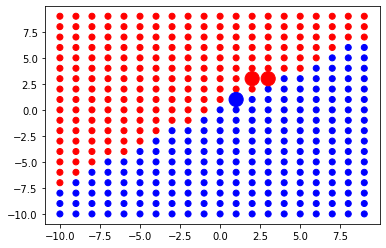

In [3]:

dataset_inputs = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
dataset_expected_outputs = np.array([
      1,
      -1,
      -1
])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

model = mylib.create_linear_model(2)

x = np.ctypeslib.as_array(model, (3,))

test_dataset = [[x1, x2] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]


flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
arr_size_flattened = len(flattened_dataset_inputs)
arr_type_flattened = c_float * arr_size_flattened
arr_flattened = arr_type_flattened(*flattened_dataset_inputs)

arr_size_outputs = len(dataset_expected_outputs)
arr_type_outputs = c_float * arr_size_outputs
arr_outputs = arr_type_outputs(*dataset_expected_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), arr_type_flattened, arr_type_outputs, c_float, c_int, c_int, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_flattened, arr_outputs, 0.001, 10000, len(x), len(flattened_dataset_inputs))

result = []
for p in test_dataset:
    arr_size_result = len(p)
    arr_type_result = c_float * arr_size_result
    arr_result = arr_type_result(*p)
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_type_result, c_int]
    mylib.predict_linear_model_classification.restype = c_float

 

    tmp = mylib.predict_linear_model_classification(model, arr_result, len(x))
    result.append(tmp)

 

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None
mylib.destroy_linear_model(model)

### MLP (2,1)

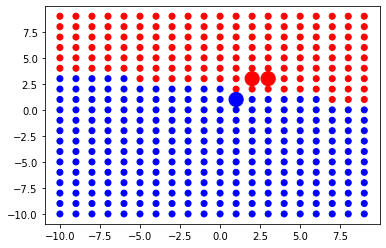

In [4]:
dataset_inputs = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
dataset_expected_outputs = np.array([
      1,
      -1,
      -1
])


init_tab = [2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

# definition des fonctions : 

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1, x2] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]
mylib.getLengthX.argtypes = [c_void_p]
mylib.restype = c_int
tmp_len = mylib.getLengthX(model)


flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

    
#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp,0.001, 100000)
predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = []
    
    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

### Modele linéaire 

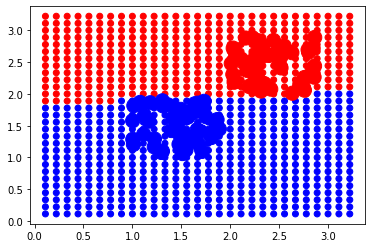

In [6]:
dataset_inputs = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
dataset_expected_outputs = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

model = mylib.create_linear_model(2)
x = np.ctypeslib.as_array(model, (3,))
test_dataset = [[x1/9, x2/9] for x1 in range(1, 30) for x2 in range(1, 30)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
arr_size_flattened = len(flattened_dataset_inputs)
arr_type_flattened = c_float * arr_size_flattened
arr_flattened = arr_type_flattened(*flattened_dataset_inputs)

arr_size_outputs = len(dataset_expected_outputs)
arr_type_outputs = c_float * arr_size_outputs
arr_outputs = arr_type_outputs(*dataset_expected_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), arr_type_flattened, arr_type_outputs, c_float, c_int, c_int, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_flattened, arr_outputs, 0.001, 10000, len(x), len(flattened_dataset_inputs))

result = []
for p in test_dataset:
    arr_size_result = len(p)
    arr_type_result = c_float * arr_size_result
    arr_result = arr_type_result(*p)
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_type_result, c_int]
    mylib.predict_linear_model_classification.restype = c_float

 

    tmp = mylib.predict_linear_model_classification(model, arr_result, len(x))
    result.append(tmp)

 

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None
mylib.destroy_linear_model(model)

### MLP (2,1)

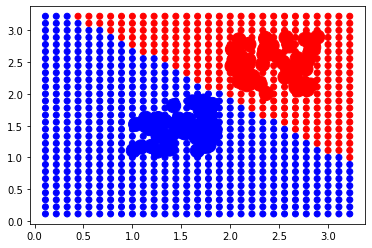

In [9]:
dataset_inputs = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
dataset_expected_outputs = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

init_tab = [2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1/9, x2/9] for x1 in range(1, 30) for x2 in range(1, 30)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

mylib.getLengthX.argtypes = [c_void_p]
mylib.restype = c_int
tmp_len = mylib.getLengthX(model)

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

    
#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp,0.001, 100000)
predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = []
    
    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

### Modele linéaire

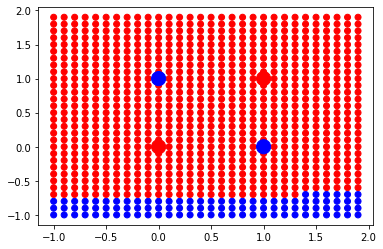

In [10]:
dataset_inputs = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
dataset_expected_outputs = np.array([1, 1, -1, -1])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

model = mylib.create_linear_model(2)

x = np.ctypeslib.as_array(model, (3,))

test_dataset = [[x1/10, x2/10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
arr_size_flattened = len(flattened_dataset_inputs)
arr_type_flattened = c_float * arr_size_flattened
arr_flattened = arr_type_flattened(*flattened_dataset_inputs)

arr_size_outputs = len(dataset_expected_outputs)
arr_type_outputs = c_float * arr_size_outputs
arr_outputs = arr_type_outputs(*dataset_expected_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), arr_type_flattened, arr_type_outputs, c_float, c_int, c_int, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_flattened, arr_outputs, 0.001, 10000, len(x), len(flattened_dataset_inputs))

result = []
for p in test_dataset:
    arr_size_result = len(p)
    arr_type_result = c_float * arr_size_result
    arr_result = arr_type_result(*p)
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_type_result, c_int]
    mylib.predict_linear_model_classification.restype = c_float

 

    tmp = mylib.predict_linear_model_classification(model, arr_result, len(x))
    result.append(tmp)

 

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None
mylib.destroy_linear_model(model)

### MLP (2,2,1)

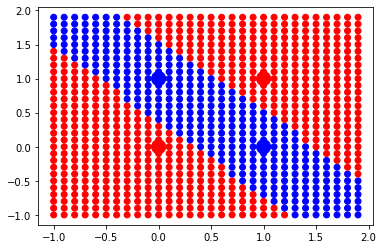

In [11]:
dataset_inputs = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
dataset_expected_outputs = np.array([1, 1, -1, -1])

init_tab = [2, 2, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

# definition des fonctions : 

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 20) for x2 in range(-10, 20)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

    
#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp,0.001, 100000)
predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = []
    
    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in dataset_inputs], [p[1] for p in dataset_inputs], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

### Model Lineaire

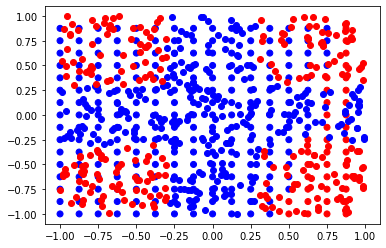

<Figure size 432x288 with 0 Axes>

In [32]:
dataset_inputs = np.random.random((500, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

model = mylib.create_linear_model(2)

x = np.ctypeslib.as_array(model, (3,))
# print(x)

test_dataset = [[x1/8, x2/8] for x1 in range(-8, 8) for x2 in range(-8, 8)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]


flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])
    
arr_size_flattened = len(flattened_dataset_inputs)
arr_type_flattened = c_float * arr_size_flattened
arr_flattened = arr_type_flattened(*flattened_dataset_inputs)

arr_size_outputs = len(dataset_expected_outputs)
arr_type_outputs = c_float * arr_size_outputs
arr_outputs = arr_type_outputs(*dataset_expected_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), arr_type_flattened, arr_type_outputs, c_float, c_int, c_int, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_flattened, arr_outputs, 0.001, 10000, len(x), len(flattened_dataset_inputs))

result = []
for p in test_dataset:
    arr_size_result = len(p)
    arr_type_result = c_float * arr_size_result
    arr_result = arr_type_result(*p)
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_type_result, c_int]
    mylib.predict_linear_model_classification.restype = c_float

 

    tmp = mylib.predict_linear_model_classification(model, arr_result, len(x))
    result.append(tmp)

 

predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None
mylib.destroy_linear_model(model)

### MLP(2,4,1)

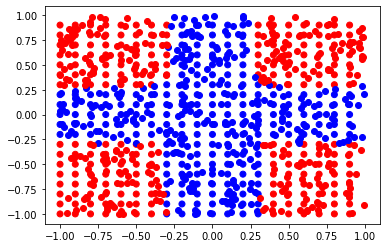

In [16]:
dataset_inputs = np.random.random((500, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in dataset_inputs])

X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])


init_tab = [2, 4, 1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

# definition des fonctions : 

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if output >= 0 else "red" for output in dataset_expected_outputs]

mylib.getLengthX.argtypes = [c_void_p]
mylib.restype = c_int
tmp_len = mylib.getLengthX(model)

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

    
#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp,0.1, 100000)
predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)
    tmp = []
    
    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr[0])
    
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

### Modele linéaire

[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -

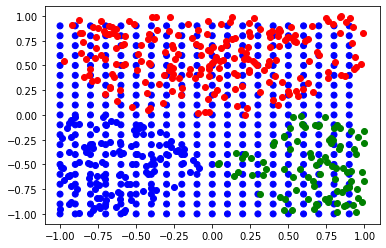

<Figure size 432x288 with 0 Axes>

In [29]:
dataset_inputs = np.random.random((500, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in dataset_inputs])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

model = mylib.create_linear_model(3)

x = np.ctypeslib.as_array(model, (4,))

test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in dataset_expected_outputs]

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in dataset_expected_outputs:
  flattened_dataset_outputs.append(p[0])
  flattened_dataset_outputs.append(p[1])
  flattened_dataset_outputs.append(p[2])

#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(flattened_dataset_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*flattened_dataset_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), arrtype_flat, arrtype_exp, c_float, c_int, c_int, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_flat, arr_exp, 0.2, 100000, len(x), len(flattened_dataset_inputs))

result = []
for p in test_dataset:
    arr_size_result = len(p)
    arr_type_result = c_float * arr_size_result
    arr_result = arr_type_result(*p)
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_type_result, c_int]
    mylib.predict_linear_model_classification.restype = c_float

 

    tmp = mylib.predict_linear_model_classification(model, arr_result, len(x))
    result.append(tmp)
    
print(result)

    
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][0] == 1, enumerate(dataset_inputs)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][0] == 1, enumerate(dataset_inputs)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][1] == 1, enumerate(dataset_inputs)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][1] == 1, enumerate(dataset_inputs)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][2] == 1, enumerate(dataset_inputs)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][2] == 1, enumerate(dataset_inputs)))))[:,1], color='green')
plt.show()
plt.clf()

### MLP(2,3)

[array([ 0.6553911 , -0.15105866,  0.47521645], dtype=float32), array([ 0.6487549 , -0.08483841,  0.43897006], dtype=float32), array([ 0.64201856, -0.01786012,  0.40123627], dtype=float32), array([0.63518155, 0.04927884, 0.36208966], dtype=float32), array([0.6282436 , 0.11597537, 0.32162282], dtype=float32), array([0.6212042 , 0.18164219, 0.27994585], dtype=float32), array([0.6140632 , 0.24572803, 0.23718631], dtype=float32), array([0.6068201 , 0.30773538, 0.19348755], dtype=float32), array([0.5994749 , 0.36723456, 0.14900735], dtype=float32), array([0.5920273 , 0.42387277, 0.10391586], dtype=float32), array([0.5844772 , 0.4773792 , 0.05839309], dtype=float32), array([0.5768245 , 0.5275651 , 0.01262618], dtype=float32), array([ 0.56906915,  0.57432044, -0.0331937 ], dtype=float32), array([ 0.5612113 ,  0.6176068 , -0.07887447], dtype=float32), array([ 0.5532509 ,  0.65744925, -0.12422638], dtype=float32), array([ 0.5451882 ,  0.69392586, -0.16906513], dtype=float32), array([ 0.5370233 

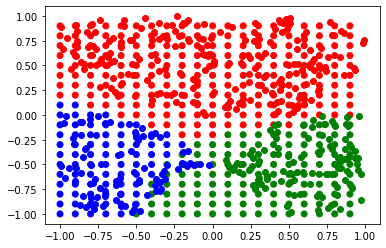

<Figure size 432x288 with 0 Axes>

In [24]:
dataset_inputs = np.random.random((500, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in dataset_inputs])

init_tab = [2, 3]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in dataset_expected_outputs]

mylib.getLengthX.argtypes = [c_void_p]
mylib.restype = c_int
tmp_len = mylib.getLengthX(model)

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in dataset_expected_outputs:
  flattened_dataset_outputs.append(p[0])
  flattened_dataset_outputs.append(p[1])
  flattened_dataset_outputs.append(p[2])

#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(flattened_dataset_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*flattened_dataset_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp, 0.001,10000)

predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)

    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr)
    
print(predicted_outputs)
    
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][0] == 1, enumerate(dataset_inputs)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][0] == 1, enumerate(dataset_inputs)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][1] == 1, enumerate(dataset_inputs)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][1] == 1, enumerate(dataset_inputs)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][2] == 1, enumerate(dataset_inputs)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: dataset_expected_outputs[c[0]][2] == 1, enumerate(dataset_inputs)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

### Linear Model x3

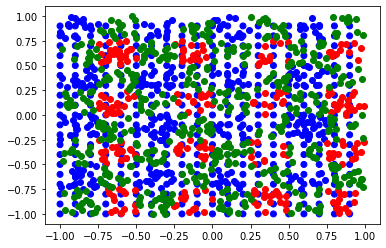

<Figure size 432x288 with 0 Axes>

In [33]:
dataset_inputs = np.random.random((1000, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

model = mylib.create_linear_model(3)

x = np.ctypeslib.as_array(model, (4,))

test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in dataset_expected_outputs]

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in dataset_expected_outputs:
  flattened_dataset_outputs.append(p[0])
  flattened_dataset_outputs.append(p[1])
  flattened_dataset_outputs.append(p[2])

#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(flattened_dataset_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*flattened_dataset_outputs)

mylib.train_classification_rosenblatt_rule_linear_model.argtypes = [POINTER(c_float), arrtype_flat, arrtype_exp, c_float, c_int, c_int, c_int]
mylib.train_classification_rosenblatt_rule_linear_model.restype = None
mylib.train_classification_rosenblatt_rule_linear_model(model, arr_flat, arr_exp, 0.2, 100000, len(x), len(flattened_dataset_inputs))

result = []
for p in test_dataset:
    arr_size_result = len(p)
    arr_type_result = c_float * arr_size_result
    arr_result = arr_type_result(*p)
    mylib.predict_linear_model_classification.argtypes = [POINTER(c_float), arr_type_result, c_int]
    mylib.predict_linear_model_classification.restype = c_float

 

    tmp = mylib.predict_linear_model_classification(model, arr_result, len(x))
    result.append(tmp)
    

    
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in result]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### MLP (2,?,?,3)

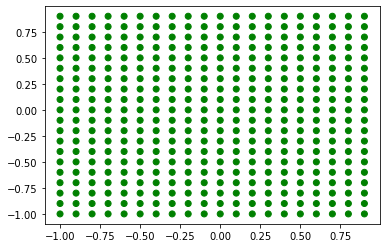

<Figure size 432x288 with 0 Axes>

In [103]:
dataset_inputs = np.random.random((1000, 2)) * 2.0 - 1.0
dataset_expected_outputs = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

init_tab = [2, 3,4 ,3]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))
test_dataset = [[x1 / 10, x2 / 10] for x1 in range(-10, 10) for x2 in range(-10, 10)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in dataset_expected_outputs]

mylib.getLengthX.argtypes = [c_void_p]
mylib.restype = c_int
tmp_len = mylib.getLengthX(model)

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])
  flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in dataset_expected_outputs:
  flattened_dataset_outputs.append(p[0])
  flattened_dataset_outputs.append(p[1])
  flattened_dataset_outputs.append(p[2])

#definition de train_classification_stochastic_gradient....
arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(flattened_dataset_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*flattened_dataset_outputs)

mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp,c_float,c_int]
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp, 0.01,100000)

predicted_outputs = []
for p in test_dataset:
    arrsizeP = len(p)
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*p)
    mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
    mylib.predict_mlp_model_classification.restype = POINTER(c_float)

    tmp = mylib.predict_mlp_model_classification(model, arrP)
    np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
    predicted_outputs.append(np_arr)

predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
#plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
#plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
#plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

### Linear Model

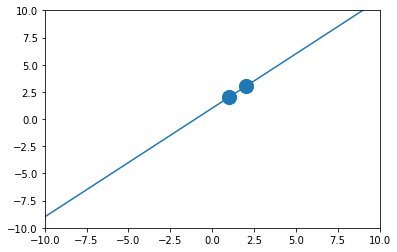

In [5]:
dataset_inputs = np.array([
      [1],
      [2]
])
dataset_expected_outputs = np.array([
      2,
      3
])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

 

model = mylib.create_linear_model(1)
x = np.ctypeslib.as_array(model, (2,))
#arrsize = len(model)
#arrtype = c_float * arrsize
#arr = arrtype(*model)

 

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(float(p[0]))

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))


test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)
    
plt.plot(test_dataset_inputs, result)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)


### MLP (1,1)

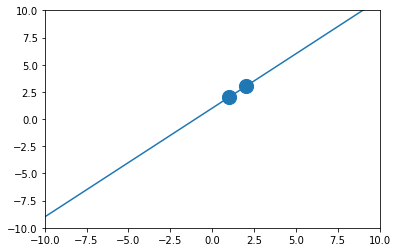

In [125]:
dataset_inputs = np.array([
      [1],
      [2]
])
dataset_expected_outputs = np.array([
      2,
      3
])

init_tab = [1,1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])

arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)


mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp, c_float, c_int]
mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_regression_stochastic_gradient_backpropagation_mlp_model(model,arr_flat,arrsize_flat, arr_exp,0.001, 100000)

test_dataset_inputs = [i for i in range(-10, 11)]

predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len([p])
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*[p])
    
    mylib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    mylib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp=[]
    
    tmp = mylib.predict_mlp_model_regression(model, arrP)
   
    predicted_outputs.append(tmp[0])
        
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

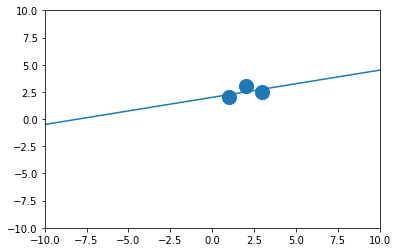

In [110]:
dataset_inputs = np.array([
      [1],
      [2],
      [3]
])
dataset_expected_outputs = np.array([
      2,
      3,
      2.5
])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

 

model = mylib.create_linear_model(1)
x = np.ctypeslib.as_array(model, (2,))
#arrsize = len(model)
#arrtype = c_float * arrsize
#arr = arrtype(*model)

 

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(float(p[0]))

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))


test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)
    
plt.plot(test_dataset_inputs, result)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)


### MLP (1,3,1)

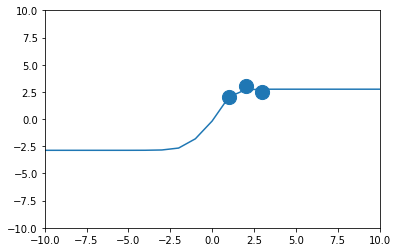

In [131]:
dataset_inputs = np.array([
      [1],
      [2],
      [3]
])
dataset_expected_outputs = np.array([
      2,
      3,
      2.5
])

x = [1, 3, 1]
arr_sizex = len(x)
arr_typex = c_int * arr_sizex
arrx = arr_typex(*x)

mylib.create_mlp_model.argtypes = [arr_typex, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(arrx, int(arr_sizex))

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])

arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)


mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp, c_float, c_int]
mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_regression_stochastic_gradient_backpropagation_mlp_model(model,arr_flat,arrsize_flat, arr_exp,0.002, 100000)

test_dataset_inputs = [i for i in range(-10, 11)]

predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len([p])
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*[p])
    
    mylib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    mylib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp=[]
    
    tmp = mylib.predict_mlp_model_regression(model, arrP)
   
    predicted_outputs.append(tmp[0])
        
plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

### Linear Model

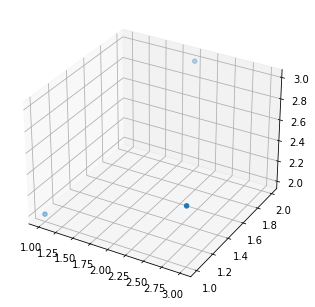

<Figure size 432x288 with 0 Axes>

In [114]:
from mpl_toolkits.mplot3d import Axes3D

dataset_inputs = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
dataset_expected_outputs = np.array([
      2,
      3,
      2.5
])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

 

model = mylib.create_linear_model(1)
x = np.ctypeslib.as_array(model, (2,))
#arrsize = len(model)
#arrtype = c_float * arrsize
#arr = arrtype(*model)

 

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(float(p[0]))

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))


test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)
    
#plt.plot(test_dataset_inputs, result)
#plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
#plt.axis([-10, 10, -10, 10])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(dataset_inputs[:,0],dataset_inputs[:,1],dataset_expected_outputs)
plt.show()
plt.clf()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)

### MLP(2,1)

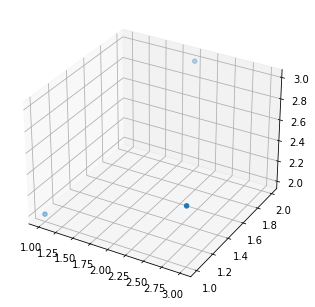

<Figure size 432x288 with 0 Axes>

In [120]:
dataset_inputs = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
dataset_expected_outputs = np.array([
      2,
      3,
      2.5
])

init_tab = [1,1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])

arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)


mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp, c_float, c_int]
mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_regression_stochastic_gradient_backpropagation_mlp_model(model,arr_flat,arrsize_flat, arr_exp,0.001, 100000)

test_dataset_inputs = [i for i in range(-10, 11)]

predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len([p])
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*[p])
    
    mylib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    mylib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp=[]
    
    tmp = mylib.predict_mlp_model_regression(model, arrP)
   
    predicted_outputs.append(tmp[0])

#print(predicted_outputs)
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(test_dataset_inputs, predicted_outputs)
ax.scatter(dataset_inputs[:,0],dataset_inputs[:,1],dataset_expected_outputs)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

### Linear Model

In [ ]:
dataset_inputs = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
dataset_expected_outputs = np.array([
      1,
      2,
      3
])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

 

model = mylib.create_linear_model(1)
x = np.ctypeslib.as_array(model, (2,))
#arrsize = len(model)
#arrtype = c_float * arrsize
#arr = arrtype(*model)

 

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(float(p[0]))

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))


test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)
    
#plt.plot(test_dataset_inputs, result)
#plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
#plt.axis([-10, 10, -10, 10])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(dataset_inputs[:,0],dataset_inputs[:,1],dataset_expected_outputs)
plt.show()
plt.clf()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)

### MLP (2,1)

In [ ]:
dataset_inputs = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
dataset_expected_outputs = np.array([
      1,
      2,
      3
])

init_tab = [1,1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])

arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)


mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp, c_float, c_int]
mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_regression_stochastic_gradient_backpropagation_mlp_model(model,arr_flat,arrsize_flat, arr_exp,0.001, 100000)

test_dataset_inputs = [i for i in range(-10, 11)]

predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len([p])
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*[p])
    
    mylib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    mylib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp=[]
    
    tmp = mylib.predict_mlp_model_regression(model, arrP)
   
    predicted_outputs.append(tmp[0])

#print(predicted_outputs)
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(test_dataset_inputs, predicted_outputs)
ax.scatter(dataset_inputs[:,0],dataset_inputs[:,1],dataset_expected_outputs)
plt.show()
plt.clf()

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

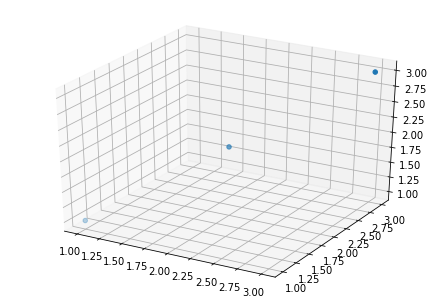

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

### Linear Model

In [ ]:
dataset_inputs = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
dataset_expected_outputs = np.array([
      2,
      1,
      -2,
      -1
])

mylib.create_linear_model.argtypes = [c_int]
mylib.create_linear_model.restype = POINTER(c_float)

 

model = mylib.create_linear_model(1)
x = np.ctypeslib.as_array(model, (2,))
#arrsize = len(model)
#arrtype = c_float * arrsize
#arr = arrtype(*model)

 

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(float(p[0]))

arr_flat_size = len(flattened_dataset_inputs)
arr_flat_type = c_float * arr_flat_size
arr_flattened_dataset_inputs = arr_flat_type(*flattened_dataset_inputs)

arr_dataset_size = len(dataset_expected_outputs)
arr_dataset_type = c_float * arr_dataset_size
arr_dataset = arr_dataset_type(*dataset_expected_outputs)

mylib.train_regression_pseudo_inverse_linear_model.argtypes = [POINTER(c_float), arr_flat_type, arr_dataset_type, c_int, c_int,c_int]

mylib.train_regression_pseudo_inverse_linear_model(model, arr_flattened_dataset_inputs, arr_dataset,2,len(flattened_dataset_inputs), len(dataset_expected_outputs))


test_dataset_inputs = []
for i in range(-10, 11):
    temp = i
    test_dataset_inputs.append(float(temp))
    
result = []
for p in test_dataset_inputs:
    arrsizeP = len([p])
    arrtypeP = c_float * arrsizeP
    arrP = arrtypeP(*[p])
    mylib.predict_linear_model_regression.argtypes = [POINTER(c_float), arrtypeP, c_int]
    mylib.predict_linear_model_regression.restype = c_float

    tmp = mylib.predict_linear_model_regression(model, arrP, 2)
    result.append(tmp)
    
#plt.plot(test_dataset_inputs, result)
#plt.scatter([p[0] for p in dataset_inputs], dataset_expected_outputs, s=200)
#plt.axis([-10, 10, -10, 10])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(dataset_inputs[:,0],dataset_inputs[:,1],dataset_expected_outputs)
plt.show()
plt.clf()


mylib.destroy_linear_model.argtypes = [POINTER(c_float)]
mylib.destroy_linear_model.restype = None

mylib.destroy_linear_model(model)

### MLP (2, 2, 1)

In [ ]:
dataset_inputs = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
dataset_expected_outputs = np.array([
      2,
      1,
      -2,
      -1
])
init_tab = [1,1]
init_size = len(init_tab)
init_type = c_int * init_size
init = init_type(*init_tab)

mylib.create_mlp_model.argtypes = [init_type, c_int]
mylib.create_mlp_model.restype = c_void_p

model = mylib.create_mlp_model(init, int(init_size))

flattened_dataset_inputs = []
for p in dataset_inputs:
  flattened_dataset_inputs.append(p[0])

arrsize_flat = len(flattened_dataset_inputs)
arrtype_flat = c_float * arrsize_flat
arr_flat = arrtype_flat(*flattened_dataset_inputs)

arrsize_exp = len(dataset_expected_outputs)
arrtype_exp = c_float * arrsize_exp
arr_exp = arrtype_exp(*dataset_expected_outputs)


mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int, arrtype_exp, c_float, c_int]
mylib.train_regression_stochastic_gradient_backpropagation_mlp_model.restype = None

mylib.train_regression_stochastic_gradient_backpropagation_mlp_model(model,arr_flat,arrsize_flat, arr_exp,0.001, 100000)

test_dataset_inputs = [i for i in range(-10, 11)]

predicted_outputs = []
for p in test_dataset_inputs:
    arr_sizeP = len([p])
    arr_typeP = c_float * arr_sizeP
    arrP = arr_typeP(*[p])
    
    mylib.predict_mlp_model_regression.argtypes = [c_void_p, arr_typeP]
    mylib.predict_mlp_model_regression.restype = POINTER(c_float)
    tmp=[]
    
    tmp = mylib.predict_mlp_model_regression(model, arrP)
   
    predicted_outputs.append(tmp[0])

#print(predicted_outputs)
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(test_dataset_inputs, predicted_outputs)
ax.scatter(dataset_inputs[:,0],dataset_inputs[:,1],dataset_expected_outputs)
plt.show()
plt.clf()

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

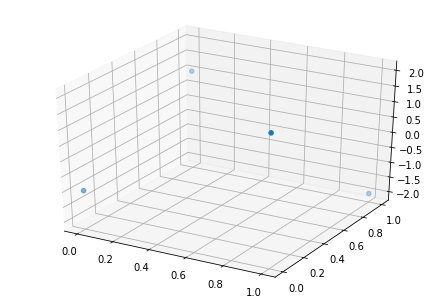

<Figure size 432x288 with 0 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()